In [1]:
import pandas as pd
import io
import requests
import numpy as np
%matplotlib inline

In [2]:
url = "https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.digits/train.6"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')))
data = np.array(c,dtype='float32');
data.shape

(663, 256)

In [3]:
#Part(a)
X=np.transpose(data)
X.shape

(256, 663)

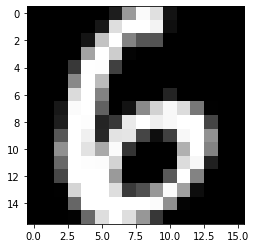

In [4]:
import matplotlib.pyplot as plt
img1 = np.reshape(X[:,5],(16,16));
imgshow = plt.imshow(img1,cmap='gray')

In [5]:
mu = np.mean(X, axis=1);
mu.shape


(256,)

In [6]:
#Part(b)
mu=np.reshape(mu,(256,1))
X_centered=X-mu
X_centered.shape

(256, 663)

In [7]:
U, s, V = np.linalg.svd(X_centered)
U.shape

(256, 256)

In [8]:
s.shape


(256,)

In [9]:
s=np.reshape(s,(256,1))
s.shape

(256, 1)

In [10]:
#part(c)
k=10
s1=s[0:k,:]

In [11]:
s1.shape


(10, 1)

In [12]:
#part(d)
Sigma1=(1/X_centered.shape[1])*(np.matmul(X_centered,np.transpose(X_centered)))
Sigma1.shape

(256, 256)

In [13]:
ei,_=np.linalg.eig(Sigma1)
ei1=-np.sort(-ei)
ei1.shape

(256,)

In [14]:
ei1=np.reshape(ei1,(256,1))
ei1.shape

(256, 1)

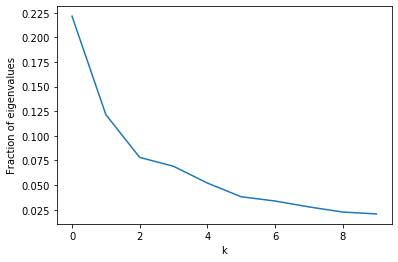

In [15]:
#part(d)
plt.plot(ei1[0:k]/np.trace(Sigma1))
plt.ylabel('Fraction of eigenvalues')
plt.xlabel('k')
plt.show()

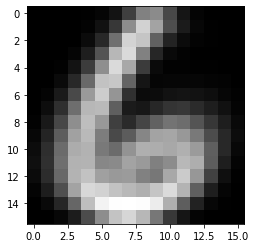

In [16]:
#part(e)
img3 = np.reshape(mu,(16,16))
imgshow = plt.imshow(img3,cmap='gray')

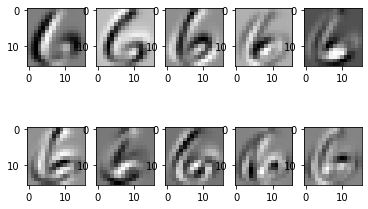

In [17]:
for i in range(1, k+1):
    plt.subplot(2, 5, i)
    plt.imshow(np.reshape(U[:,i-1],(16,16)),cmap='gray')

In [18]:
#part(f)
V.shape

(663, 663)

In [19]:
V1=np.transpose(V)

In [20]:
idx=np.argsort(V1[0,:])

In [21]:
X_sorted=X[:,idx]

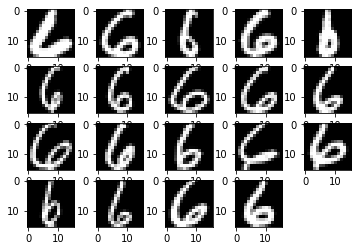

In [22]:
#plotting only the first 20 sorted data points due to space limitations
for i in range(1, 20):
    plt.subplot(4, 5, i)
    plt.imshow(np.reshape(X_sorted[:,i-1],(16,16)),cmap='gray')

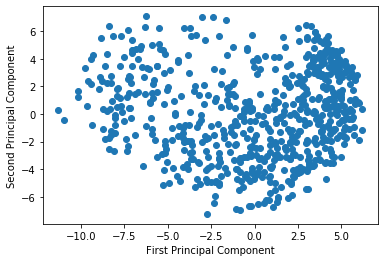

In [38]:
#(g) part
D=np.diag(np.reshape(s,[s.shape[0]]))
A=np.matmul(D,V[0:256,:])
plt.scatter(A[0,:],A[1,:])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [41]:
X_new=np.matmul(U[:,0:2],A[0:2,:])

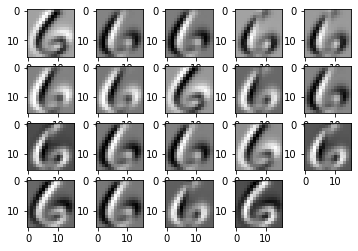

In [42]:
#plotting only the first 20 sorted data points due to space limitations
for i in range(1, 20):
    plt.subplot(4, 5, i)
    plt.imshow(np.reshape(X_new[:,i-1],(16,16)),cmap='gray')